In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
# %reload_ext autoreload

In [94]:
from pathlib import Path
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import homography, rectification, my_types, utils

In [11]:
DATA = Path("data")

# Pick Correspondences

In [12]:
PICK_NEW = False
im1_name = DATA / "doll1.jpg"
im2_name = DATA / "doll2.jpg"
im3_name = DATA / "doll3.jpg"

if PICK_NEW:
    %matplotlib tk
    im1_pts = utils.pick_points(im1_name, 8)
    im2_pts = utils.pick_points(im2_name, 8)
    # im3_pts = utils.pick_points(im3_name, 8)
    utils.save_points(im1_pts, im1_name)
    utils.save_points(im2_pts, im2_name)
    # utils.save_points(im3_pts, im3_name)
else:
    %matplotlib inline
    im1_pts = utils.load_points(im1_name)
    im2_pts = utils.load_points(im2_name)
    # im3_pts = utils.load_points(im3_name)

In [13]:
im1_pts = im1_pts[:4]
im2_pts = im2_pts[:4]

In [14]:
im1 = my_types.to_img_arr(im1_name)
im2 = my_types.to_img_arr(im2_name)
im3 = my_types.to_img_arr(im3_name)

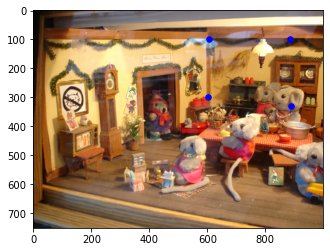

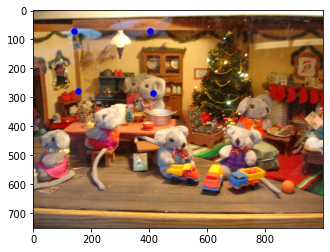

In [15]:
utils.plot_pts(im1, im1_pts)
utils.plot_pts(im2, im2_pts)

# Image Rectification

In [22]:
plane_pts = np.array([[360,  70], [360, 306], [560 , 306], [560,  70]])

In [23]:
h_matrix1 = homography.homo_matrix(im1_pts, plane_pts)
warp1, shift_pts1 = homography.forward_warp(im1, h_matrix1)

=====src=====
(750, 1000, 3)
0 0
749 999
====target====
(1167, 999, 3)
0 0
1166 999
=====interpolate=====


In [25]:
warp_pts1 = homography.warp_pts(im1_pts, h_matrix1, shift_pts1)
warp_pts1

[[606.02511206  96.67273877]
 [603.15187909 299.23566257]
 [887.60194231 327.96799218]
 [883.29209286  96.67273877]]
[[606.02511206 603.15187909 887.60194231 883.29209286]
 [ 96.67273877 299.23566257 327.96799218  96.67273877]
 [  1.           1.           1.           1.        ]]
[[360. 360. 560. 560.]
 [ 70. 306. 306.  70.]
 [  1.   1.   1.   1.]]


array([[727., 168.],
       [727., 404.],
       [927., 404.],
       [927., 168.]])

In [26]:
h_matrix2 = homography.homo_matrix(im2_pts, plane_pts)
warp2, shift_pts2 = homography.forward_warp(im2, h_matrix2)

=====src=====
(750, 1000, 3)
0 0
749 999
====target====
(896, 760, 3)
0 0
895 758
=====interpolate=====


In [27]:
warp_pts2 = homography.warp_pts(im2_pts, h_matrix2, shift_pts2)
warp_pts2

[[140.81493506  70.46474954]
 [154.72959184 277.79313544]
 [413.54220779 286.1419295 ]
 [401.0190167   69.07328386]]
[[140.81493506 154.72959184 413.54220779 401.0190167 ]
 [ 70.46474954 277.79313544 286.1419295   69.07328386]
 [  1.           1.           1.           1.        ]]
[[360. 360. 560. 560.]
 [ 70. 306. 306.  70.]
 [  1.   1.   1.   1.]]


array([[159.,  82.],
       [159., 318.],
       [359., 318.],
       [359.,  82.]])

/Users/aprilsin/GitHub/cs194-proj5/rectification.py:8: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is "two-band":


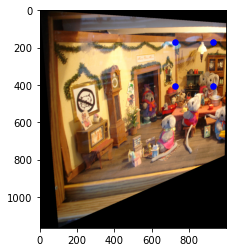

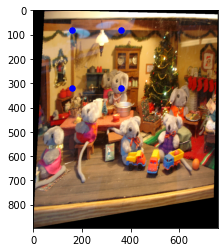

In [30]:
utils.plot_pts(warp1, warp_pts1)
utils.plot_pts(warp2, warp_pts2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


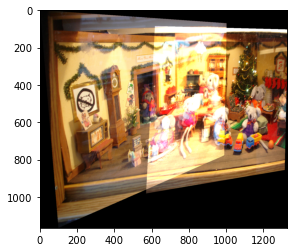

In [112]:
aligned1, aligned2 = rectification.align(warp1, warp2, warp_pts1, warp_pts2)
plt.imshow(aligned1 + aligned2)

In [ ]:
blended = rectification.blend(aligned1, aligned2)